In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project code and Files/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# checking the shape of the dataset
df.shape

(10000, 14)

In [ ]:
#drop columns
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [ ]:
#Checking null/ missing values
#null values count
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#column data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#duplicate values
df.duplicated().sum()

0

In [ ]:
#rename column
df.rename(columns={'Exited':'Churn'}, inplace=True)

In [ ]:
#descriptive statistics
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


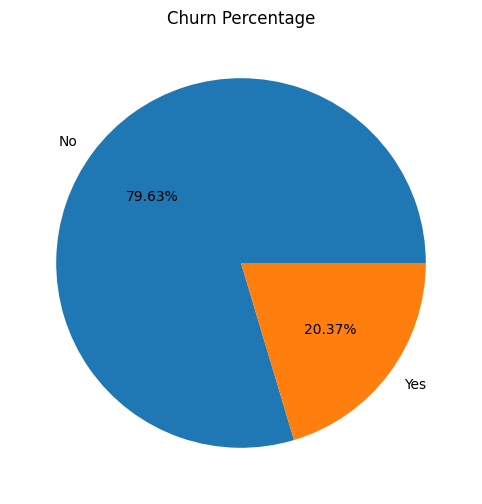

In [ ]:
# pie chart for customer churn
plt.figure(figsize=(10,6))
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%')
plt.title('Churn Percentage')
plt.show()

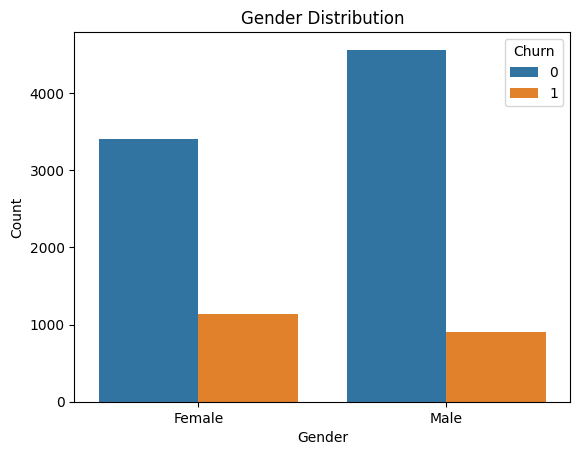

In [ ]:
# gender and customer churn
sns.countplot(x = 'Gender', data=df, hue ='Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

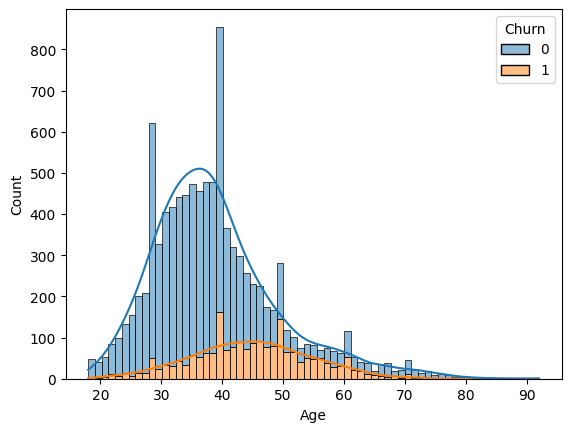

In [ ]:
#histogram of age distribution
sns.histplot(data=df, x="Age", hue="Churn", multiple="stack", kde=True)

<Axes: xlabel='Churn', ylabel='CreditScore'>

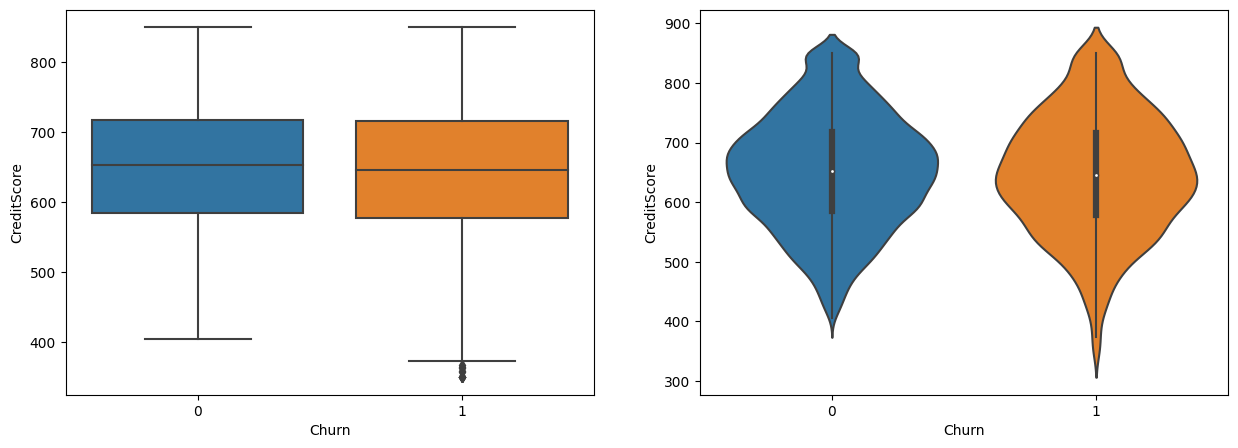

In [ ]:
#credit score
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.boxplot(x="Churn", y="CreditScore", data=df,ax=ax[0])
sns.violinplot(x="Churn", y="CreditScore", data=df, ax=ax[1])

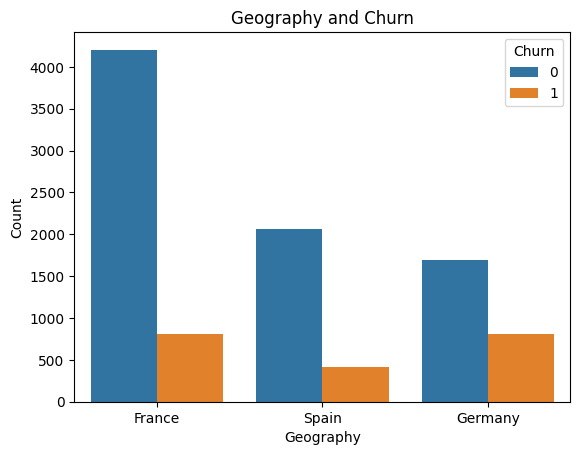

In [ ]:
#Customer location
sns.countplot(x = 'Geography', hue= 'Churn', data = df)
plt.title('Geography and Churn')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Tenure', ylabel='count'>

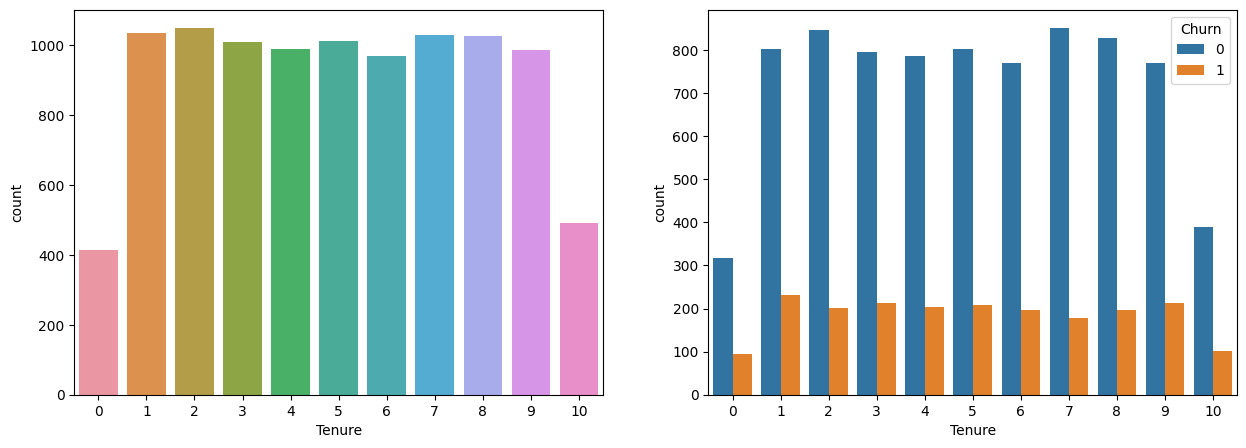

In [ ]:
#Tenure
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=df, ax=ax[0])
sns.countplot(x='Tenure', hue='Churn',data=df, ax=ax[1])

<Axes: xlabel='Balance', ylabel='Count'>

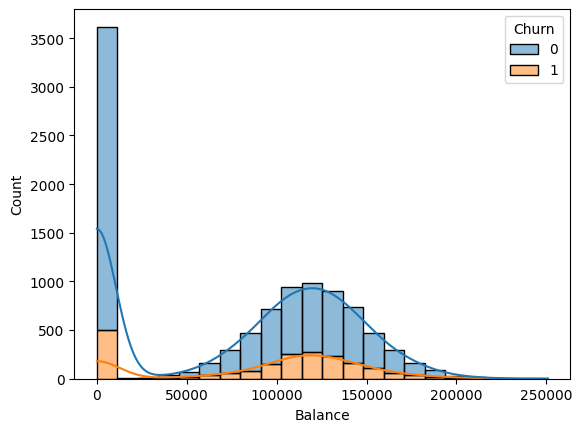

In [ ]:
#Bank Balance
sns.histplot(data=df, x="Balance", hue="Churn", multiple="stack",kde=True)

<Axes: xlabel='NumOfProducts', ylabel='count'>

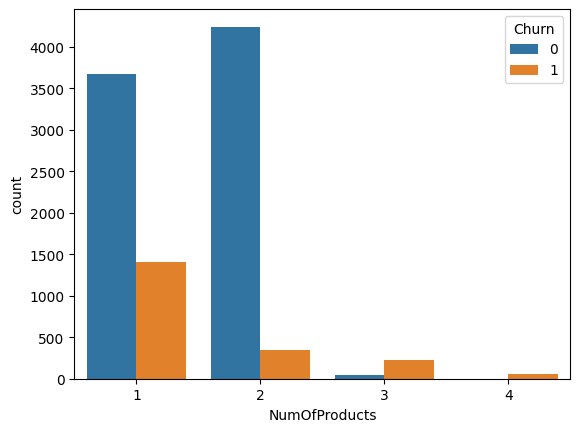

In [ ]:
# Number of products purchased
sns.countplot(x='NumOfProducts', hue='Churn', data=df)

<Axes: xlabel='HasCrCard', ylabel='count'>

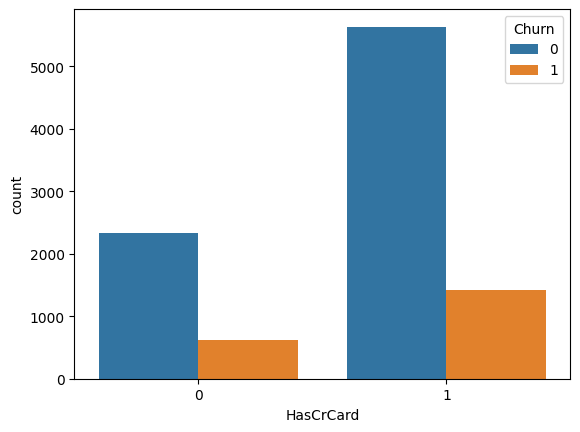

In [ ]:
#Customer with/without credit card
sns.countplot(x=df['HasCrCard'],hue=df['Churn'])

<Axes: xlabel='IsActiveMember', ylabel='count'>

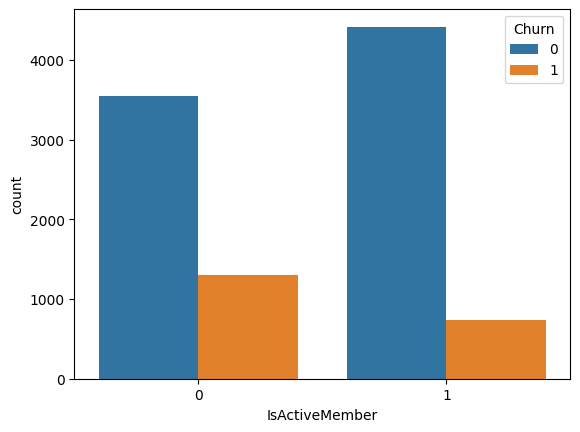

In [ ]:
#Active Members
sns.countplot(x='IsActiveMember', hue='Churn', data=df)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

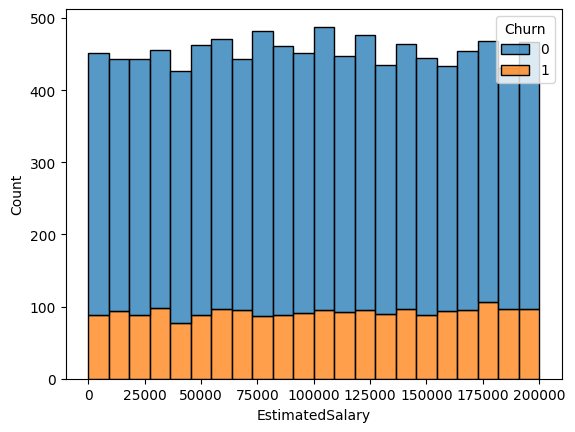

In [ ]:
#Estimated Salary
sns.histplot(data=df,x='EstimatedSalary', hue='Churn',multiple='stack')

In [ ]:
#Label encoding the variables
variables = ['Geography','Gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in variables:
  le.fit(df[i].unique())
  df[i]=le.transform(df[i])
  print(i,df[i].unique())

Geography [0 2 1]
Gender [0 1]


In [ ]:

#normalize the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0


<function matplotlib.pyplot.show(close=None, block=None)>

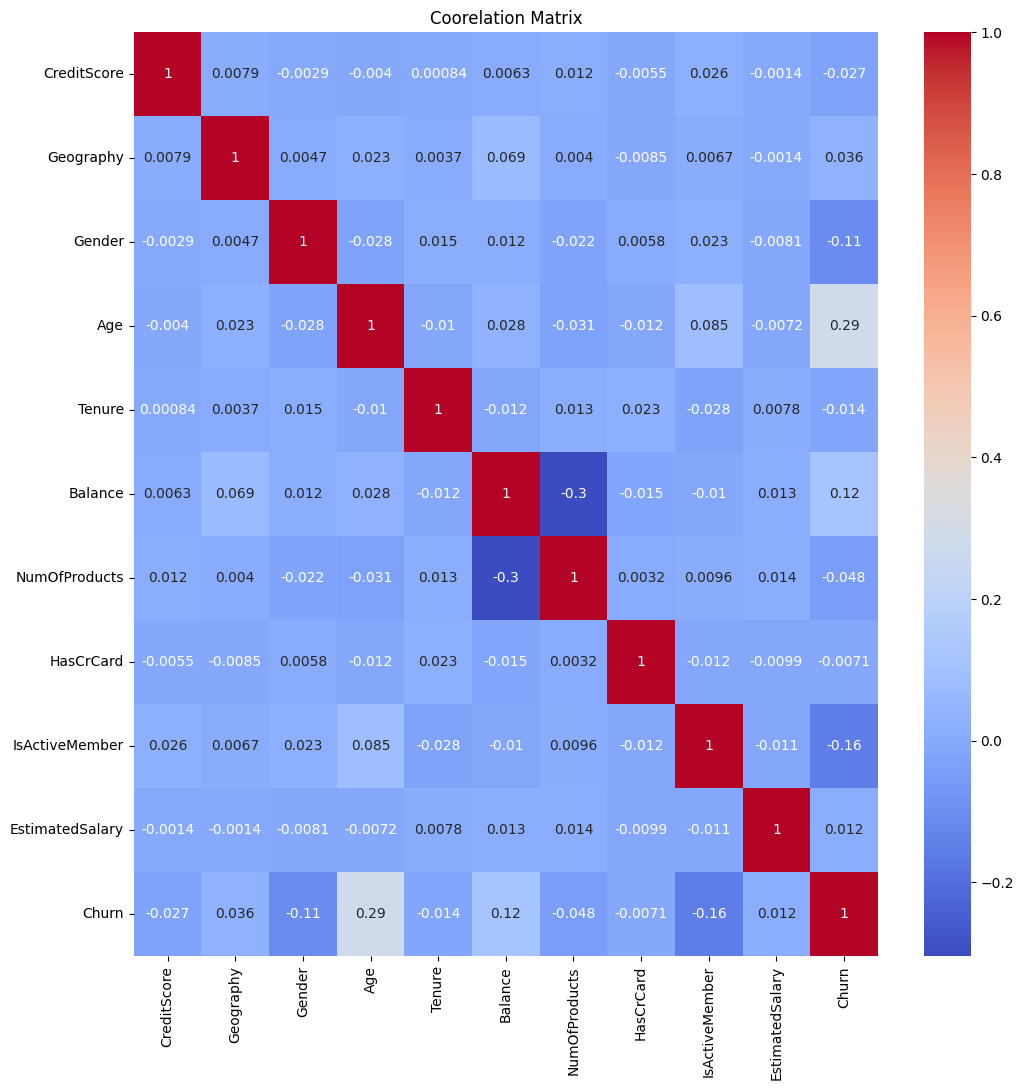

In [ ]:
#Coorelation Matrix Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Coorelation Matrix')
plt.show

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Churn',axis=1),df['Churn'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#creating Decision Tree Classifier object
dtree = DecisionTreeClassifier()
#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['ginni','entropy'],
    'random_state': [0,42]
}

#Creating grid search object
grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring ='roc_auc',n_jobs=-1)

#Fitting the grid search object to the training data
grid_dtree.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_dtree.best_params_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'random_state': 42}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1000 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
468 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _va

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42, min_samples_leaf=10)
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)

In [ ]:
#training the model
dtree.fit(X_train,y_train)
#training accuracy
dtree.score(X_train,y_train)

0.8598666666666667

In [ ]:
dtree_pred = dtree.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#creating Random Forest Classifier object
rfc = RandomForestClassifier()

#defining parameter range
param_grid ={
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'criterion': ['ginni', 'entropy'],
    'random_state': [0,42]
}

#Creating grid search object
grid_rfc = GridSearchCV(rfc,param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1)

#Fitting the grid search object to the training data
grid_rfc.fit(X_train, y_train)

#Printing the best parameters
print('Best Parameters found: ', grid_rfc.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
114 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

Best Parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'random_state': 0}


In [ ]:
rfc = RandomForestClassifier(min_samples_leaf=8, max_depth = 10, criterion ='entropy')
rfc

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8)

In [ ]:
#training the model
rfc.fit(X_train, y_train)
#model accuracy
rfc.score(X_train, y_train)

0.882

In [ ]:
#predicting the customer churn from test set
rfc_pred = rfc.predict(X_test)

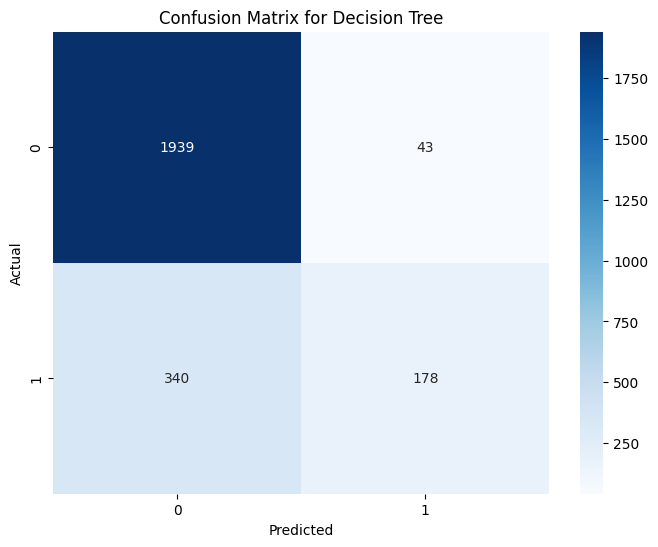

In [ ]:
#confusion matrix heatmap
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,dtree_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

<ipython-input-54-b3baf2234bdd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color='r', label="Actual Value")
<ipython-input-54-b3baf2234bdd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values", 

<Axes: xlabel='Churn', ylabel='Density'>

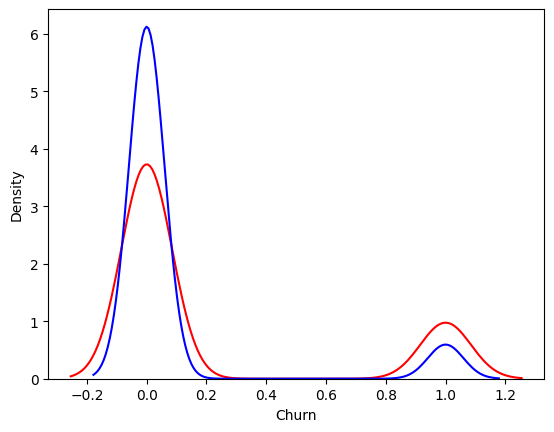

In [ ]:
#Distribution Plot
ax = sns.distplot(y_test, hist=False, color='r', label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values", ax=ax)

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1982
           1       0.81      0.34      0.48       518

    accuracy                           0.85      2500
   macro avg       0.83      0.66      0.70      2500
weighted avg       0.84      0.85      0.82      2500



In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
print("Accuracy Score: ", accuracy_score(y_test, dtree_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, dtree_pred))
print("R2 Score: ", r2_score(y_test, dtree_pred))


Accuracy Score:  0.8468
Mean Absolute Error:  0.1532
R2 Score:  0.06737860824641861


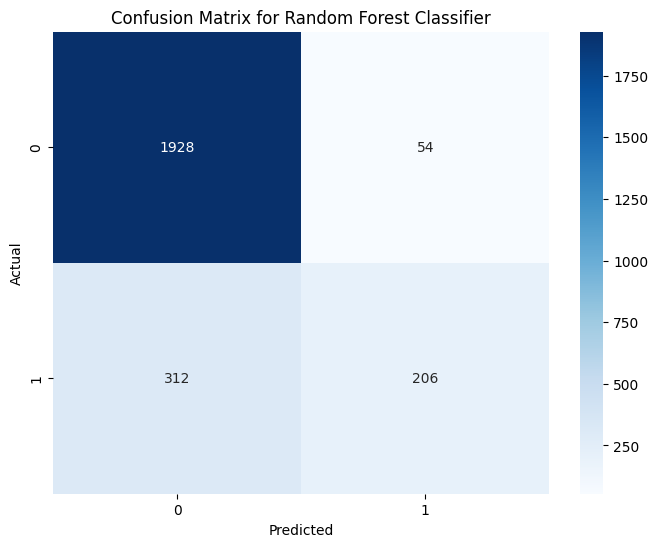

In [ ]:
#Random Forest Classifier
# confusion matrix heatmap

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()



<ipython-input-59-9f1c0c13a65c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-59-9f1c0c13a65c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfc_pred, hist=False, color="b", label="Fitted Values" , a

<Axes: xlabel='Churn', ylabel='Density'>

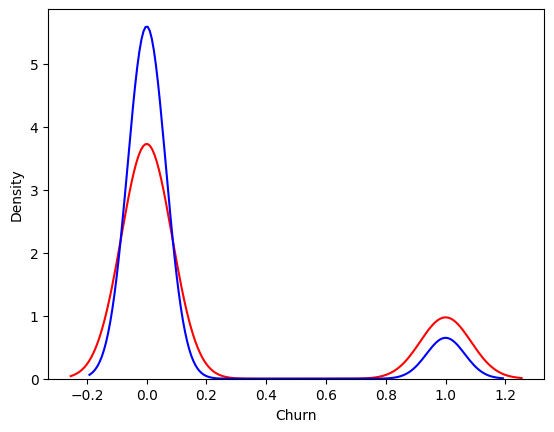

In [ ]:
#Distribution Plot

ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

In [ ]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))


              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1982
           1       0.79      0.40      0.53       518

    accuracy                           0.85      2500
   macro avg       0.83      0.69      0.72      2500
weighted avg       0.85      0.85      0.83      2500



In [ ]:

print("Accuracy Score: ", accuracy_score(y_test, rfc_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rfc_pred))
print("R2 Score: ", r2_score(y_test, rfc_pred))

Accuracy Score:  0.8536
Mean Absolute Error:  0.1464
R2 Score:  0.10877433581772644
